In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import collections

In [2]:
DATA_DIR="robot_scientists/"
dark_concepts_file=DATA_DIR + "dark-entities-parents.tsv"
light_concepts_file=DATA_DIR + "light-entities-parents.tsv"
nonentities_concepts_file=DATA_DIR + "nonentities-concepts.tsv"

sparql = SPARQLWrapper("http://sparql.fii800.lod.labs.vu.nl/sparql")

<IPython.core.display.Javascript object>


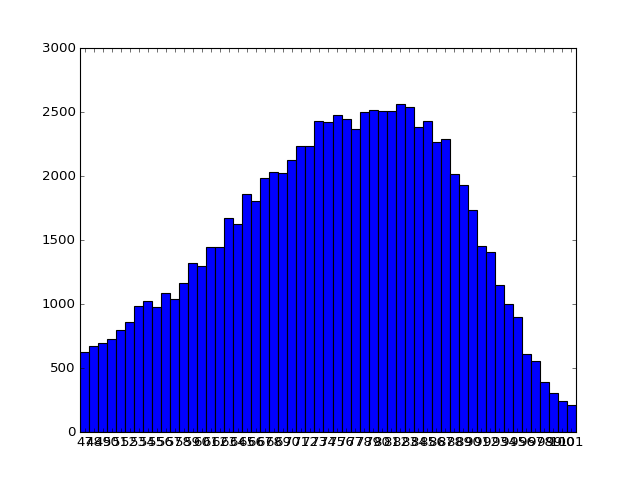

In [8]:
def plot_me(d):
    data=collections.OrderedDict(sorted(d.items()))
    keys=data.keys()
    values=data.values()
    indexes = np.arange(len(keys))

    width = 1

    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, keys)
    plt.show()


In [4]:
def get_most_common_attributes(a_type, how_much=10):

    query="""
    SELECT ?property count(DISTINCT ?entity) as ?cnt
        WHERE {
        ?entity a <%s> ;
        ?property ?value
        } GROUP BY ?property
         ORDER BY DESC(?cnt)
        LIMIT %d
    """ % (a_type, how_much)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    
    for result in results["results"]["bindings"]:
        print(result["property"]["value"], result["cnt"]["value"])

In [5]:
def get_distribution_for_class_attribute(a_type, an_attribute):
    query="""
    SELECT ?value count(DISTINCT ?entity) as ?cnt
        WHERE {
        ?entity a <%s> ;
        <%s> ?value
        } GROUP BY ?value
         ORDER BY DESC(?cnt)
    """ % (a_type, an_attribute)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    
    for result in results["results"]["bindings"]:
        print(result["value"]["value"], result["cnt"]["value"])

In [ ]:
get_distribution_for_class_attribute("http://dbpedia.org/ontology/Physicist", "http://xmlns.com/foaf/0.1/gender")

In [6]:
def get_lifespan_for_type(a_type):
    query="""
    SELECT ?age count(?entity) as ?cnt
        WHERE {
        ?entity a <%s> ;
         <http://dbpedia.org/property/birthDate> ?birthdate ;
         <http://dbpedia.org/property/deathDate> ?deathdate .
        filter (datatype(?birthdate) = xsd:date) .
        filter (datatype(?deathdate) = xsd:date) .
        bind( year(?deathdate)-year(?birthdate) as ?age )
        } GROUP BY ?age
        ORDER BY DESC(?cnt)
    """ % (a_type)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    distribution={}
    for result in results["results"]["bindings"]:
        distribution[int(result["age"]["value"])]=int(result["cnt"]["value"])
    return distribution

In [21]:
def reject_outliers(data, m = 2.5):
    data=np.array(data)
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [34]:
d=get_lifespan_for_type("http://dbpedia.org/ontology/Politician")
d_as_list=[]
for element in d.keys():
    cnt=0
    while cnt<d[element]:
        d_as_list.append(element)
        cnt+=1
#print(d_as_list)
without_outliers=reject_outliers(d_as_list)
#plot_me(d)

In [35]:
print(len(d_as_list))
print(len(without_outliers))
print(d_as_list)
print(without_outliers)

6646
6075
[0, 0, 0, 0, 3, 3, 19, 19, 24, 24, 28, 28, 29, 29, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,

<IPython.core.display.Javascript object>


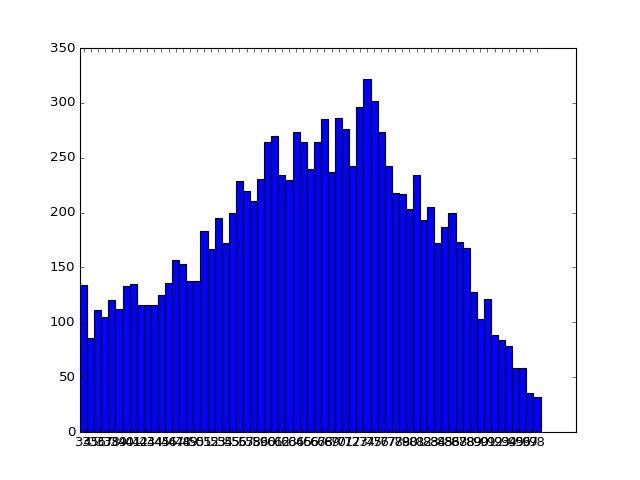

In [30]:
plot_me(collections.Counter(without_outliers))

In [ ]:
N=30
with open(light_concepts_file, 'r') as concepts:
    maxOccurrences=0
    for index, c in enumerate(concepts):
        row=c.split()
        this_type=row[2].lstrip('"').rstrip('",')
        get_most_common_attributes(this_type, N)
        break
